In [1]:
import pandas as pd
from tqdm import tqdm
import json
from scipy import stats
from sklearn.preprocessing import minmax_scale
import numpy as np

### Examples for illustration

In [26]:
hatespeech = "Its always quite before the headscarves show up. Our neighbourhoods can no longer be the same."
counterspeech_gold = "Why would the presence of women wearing headscarves be seen as a disruption to quiet?"
counterspeech_A = "Isn't this view a reflection of ingrained stereotypes related to Islamophobia? By wearing the hijab, muslim women express their cultural and religious identity. It would be wrong to assume that Muslims are responsible for creating disturbance in communities."
counterspeech_B1 = "Wearing headscarves is just a matter of personal and cultural expression, much like any other choice in attire before going out. It's about personal style and comfort, not about creating any disturbance or impacting the quiet. Let's respect everyone's choices in how they present themselves, including the decision to wear headscarves, and appreciate the variety it brings to our collective experiences."
counterspeech_B = "The entire notion of headscarves disrupting peace is unfounded. Why would our neighbourhoods no longer be same? Wearing headscarves is a matter of personal expression, much like much like any other choice in attire before going out."

print(f"Hatespeech: {hatespeech}")
print(f"counterspeech_A: {counterspeech_A}")
print(f"counterspeech_B: {counterspeech_B}")

Hatespeech: Its always quite before the headscarves show up. Our neighbourhoods can no longer be the same.
counterspeech_A: Isn't this view a reflection of ingrained stereotypes related to Islamophobia? By wearing the hijab, muslim women express their cultural and religious identity. It would be wrong to assume that Muslims are responsible for creating disturbance in communities.
counterspeech_B: The entire notion of headscarves disrupting peace is unfounded. Why would our neighbourhoods no longer be same? Wearing headscarves is a matter of personal expression, much like much like any other choice in attire before going out.


In [23]:
from metrics import Metrics

compute_metrics = Metrics()

rouge_l, rouge_1, rouge_2 = compute_metrics.compute_rouge_score(predictions=[counterspeech_A], references=[hatespeech])
print(f"Rouge Scores 1: {rouge_l}, {rouge_1}, {rouge_2}")

rouge_l, rouge_1, rouge_2 = compute_metrics.compute_rouge_score(predictions=[counterspeech_B], references=[hatespeech])
print(f"Rouge Scores 2: {rouge_l}, {rouge_1}, {rouge_2}")

df1 = pd.DataFrame(columns=['hatespeech', 'counterspeech', 'predicted_counterspeech','csType'])
df1['hatespeech'] = [hatespeech]
df1['counterspeech'] = [hatespeech]
df1['predicted_counterspeech'] = [counterspeech_A]
df1['csType'] = ['Informative']

df2 = pd.DataFrame(columns=['hatespeech', 'counterspeech', 'predicted_counterspeech'])
df2['hatespeech'] = [hatespeech]
df2['counterspeech'] = [hatespeech]
df2['predicted_counterspeech'] = [counterspeech_B]
df2['csType'] = ['Informative']


df1 = compute_metrics.get_generation_metrics(df1)
df2 = compute_metrics.get_generation_metrics(df2)

Rouge Scores 1: [0.07999999580000022], [0.07999999580000022], [0.0]
Rouge Scores 2: [0.21276595310095073], [0.25531914459031246], [0.07999999580000022]
Size of input df: 1
Cleaning test data
--------------------------------------------------
Calculating rouge score
--------------------------------------------------
Calculating Bleu1 and Bleu2 score
--------------------------------------------------
Calculating Meteor score


/home/ameyh/.conda/envs/cs-eval/lib/python3.9/site-packages/datasets/load.py:752: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/ameyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ameyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ameyh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--------------------------------------------------
Calculating Cosine Similarity
--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Toxicity score


Running Toxicity inference on 1 data points: 100%|██████████| 1/1 [00:00<00:00, 82.20it/s]


--------------------------------------------------
Calculating PC Score
--------------------------------------------------
Calculating CD Score


Running PC/CD/AQ inference on 1 data points: 100%|██████████| 1/1 [00:02<00:00,  2.86s/it]


--------------------------------------------------
Calculating BM25 Score
--------------------------------------------------
Calculating BM25 Score
Size of input df: 1
Cleaning test data
--------------------------------------------------
Calculating rouge score
--------------------------------------------------
Calculating Bleu1 and Bleu2 score
--------------------------------------------------
Calculating Meteor score


/home/ameyh/.conda/envs/cs-eval/lib/python3.9/site-packages/datasets/load.py:752: FutureWarning: The repository for meteor contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/meteor/meteor.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
[nltk_data] Downloading package wordnet to /home/ameyh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/ameyh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ameyh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


--------------------------------------------------
Calculating Cosine Similarity
--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Bert score


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


--------------------------------------------------
Calculating Toxicity score


Running Toxicity inference on 1 data points: 100%|██████████| 1/1 [00:00<00:00, 74.44it/s]


--------------------------------------------------
Calculating PC Score
--------------------------------------------------
Calculating CD Score


Running PC/CD/AQ inference on 1 data points: 100%|██████████| 1/1 [00:02<00:00,  2.85s/it]


--------------------------------------------------
Calculating BM25 Score
--------------------------------------------------
Calculating BM25 Score


In [25]:
for col in df1.columns:
    if col not in ['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType']:
        print('- -'*20)
        value_A = round(df1.iloc[0][col],6)
        value_B = round(df2.iloc[0][col],6)
        print(col)
        print(f"A: {value_A}\nB: {value_B}")

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
obscenity_(pred_cs)
A: 0.001164
B: 4.3e-05
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
identity_attack_(pred_cs)
A: 0.126093
B: 0.00013
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
insult_(pred_cs)
A: 0.006968
B: 0.00023
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_1_(pred_cs, cs)
A: 0.092369
B: 0.099138
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_2_(pred_cs, cs)
A: 0.014335
B: 0.015289
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
cosine_similarity
A: 0.064217
B: 0.253148
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_l_(pred_cs, cs)
A: 0.08
B: 0.297872
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_1_(pred_cs, cs)
A: 0.08
B: 0.340426
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_2_(pred_cs, cs)
A: 0.0
B: 0.12
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
meteo

In [27]:
df1.to_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechA.csv',index=False)
df2.to_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechB.csv',index=False)

In [2]:
df1 = pd.read_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechA.csv')
df2 = pd.read_csv('/home/ameyh/counterspeech-EVAL/data/illustration_counterspeechB.csv')

In [3]:
for col in df1.columns:
    if col not in ['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType'] and not col.startswith('prediction_'):
        print('- -'*20)
        value_A = df1.iloc[0][col]
        value_B = df2.iloc[0][col]
        print(col)
        print(f"A: {value_A}\nB: {value_B}")

- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
obscenity_(pred_cs)
A: 0.0011641413439065
B: 4.31256448791828e-05
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
identity_attack_(pred_cs)
A: 0.1260934174060821
B: 0.0001299760479014
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
insult_(pred_cs)
A: 0.006968037225306
B: 0.0002301395434187
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_1_(pred_cs, cs)
A: 0.0923694779116465
B: 0.0991379310344827
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
bleu_2_(pred_cs, cs)
A: 0.0143353308670557
B: 0.0152891081667543
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
cosine_similarity
A: 0.0642172600209856
B: 0.2531476537622941
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_l_(pred_cs, cs)
A: 0.0799999958000002
B: 0.2978723360796741
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -
rouge_1_(pred_cs, cs)
A: 0.0799999958000002
B: 0.340425527

### Dataset Analysis

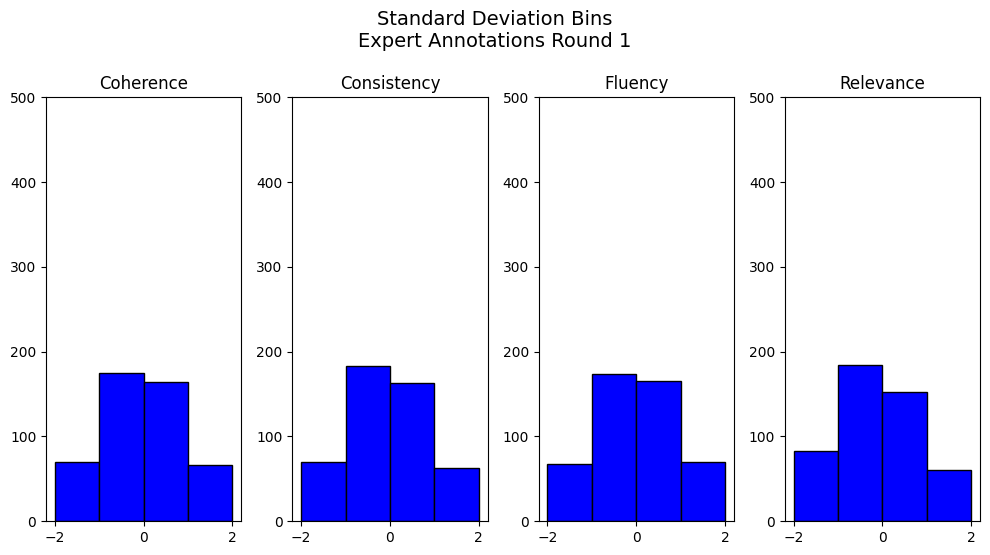

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is the dataframe with the four columns.
# Let's create a sample dataframe with dummy data.
# In your case, you should replace this with:
# df = pd.read_csv('path_to_your_csv.csv') or any other method to load your dataframe.

# Sample data
data = {
    'Coherence': np.random.normal(loc=0, scale=1, size=500),
    'Consistency': np.random.normal(loc=0, scale=1, size=500),
    'Fluency': np.random.normal(loc=0, scale=1, size=500),
    'Relevance': np.random.normal(loc=0, scale=1, size=500)
}
df = pd.DataFrame(data)

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [-2, -1, 0, 1, 2]

# Titles for subplots
titles = ['Coherence', 'Consistency', 'Fluency', 'Relevance']

for ax, column, title in zip(axes, df.columns, titles):
    ax.hist(df[column], bins=bin_edges, color='blue', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 500)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round 1', y=1.10, fontsize=14)

# Show plot
plt.show()

In [35]:
df_500 = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/annotations_first_pass_500.csv')
print(df_500.columns)
df_500.head(1)

,index,hatespeech,predicted_counterspeech,csType,relevance_score_a1,relevance_score_a2,relevance_score_a3,coherence_score_a1,coherence_score_a2,coherence_score_a3,aggressiveness_score_a1,aggressiveness_score_a2,aggressiveness_score_a3,suitableness_score_a1,suitableness_score_a2,suitableness_score_a3,suitableness_score,relevance_score,coherence_score,aggressiveness_score
0,0,Jews have no place here. They are not a part o...,Why do you believe that jews are not part of t...,Questioning,3.0,4.0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,1.666667,3.333333,2.333333,1.666667
1,1,Islam is a destructive and violent religion.,I understand that you may have concerns about ...,Positive,5.0,3.0,3.0,5.0,4.0,4.0,1.0,1.0,1.0,3.0,2.0,2.0,2.333333,3.666667,4.333333,1.000000
2,2,"Muslims are all terrorists, they have nothing ...",It is important to recognize that terrorism is...,Denouncing,4.0,2.0,4.0,3.0,4.0,3.0,1.0,1.0,1.0,3.0,2.0,3.0,2.666667,3.333333,3.333333,1.000000
3,3,"The Jews control Hollywood, academia, and media.","The jews control hollywood, academia and media...",Informative,4.0,1.0,4.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,1.0,1.0,1.000000,3.000000,1.000000,2.333333
4,4,Jews have always controlled the government and...,The jews have always been a part of the govern...,Informative,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.000000,2.333333,1.000000,1.666667


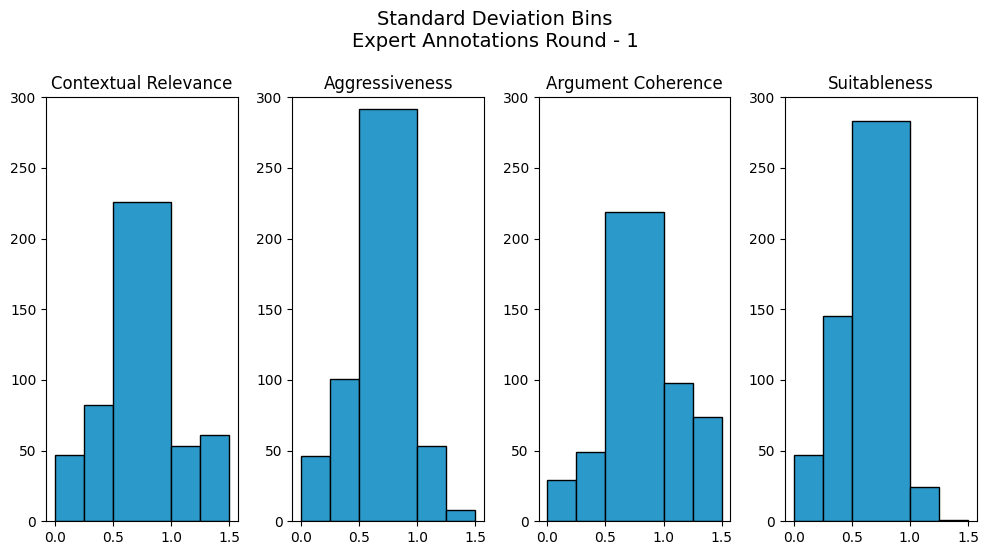

In [8]:
df_500['relevance_score_std_dev'] = df_500[['relevance_score_a1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].std(axis=1)
df_500['aggressiveness_score_std_dev'] = df_500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].std(axis=1)
df_500['coherence_score_std_dev'] = df_500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].std(axis=1)
df_500['suitableness_score_std_dev'] = df_500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].std(axis=1)

# df_500['coherence_score_std_dev'].hist(bins=8)
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [0,0.25,0.5,1,1.25,1.5]

# Titles for subplots
titles = ['Contextual Relevance', 'Aggressiveness', 'Argument Coherence', 'Suitableness']
use_cols = ['relevance_score_std_dev', 'aggressiveness_score_std_dev', 'coherence_score_std_dev', 'suitableness_score_std_dev']

for ax, column, title in zip(axes, df_500[use_cols].columns, titles):
    ax.hist(df_500[column], bins=bin_edges, color='#2b99ca', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 300)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round - 1', y=1.10, fontsize=14)

# Show plot
plt.show()

In [9]:
df_1500 = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/annotations_second_pass_1500.csv')
print(df_1500.columns)
df_1500.head(1)

Index(['hatespeech', 'counterspeech', 'predicted_counterspeech', 'csType',
       'source', 'prediction_(prompt_aggressiveness_score)_(gpt-4)',
       'prediction_(prompt_relevance_score)_(gpt-4)', 'uuid',
       'prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo)',
       'prediction_(prompt_coherence_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_relevance_score)_(gpt-3.5-turbo)',
       'prediction_(prompt_suitableness_score)_(gpt-3.5-turbo)',
       'aggressiveness_score', 'coherence_score', 'relevance_score',
       'suitableness_score', 'obscenity_(pred_cs)',
       'identity_attack_(pred_cs)', 'insult_(pred_cs)', 'bleu_1_(cs, pred_cs)',
       'bleu_2_(cs, pred_cs)', 'cosine_similarity_(hs, pred_cs)',
       'rouge_l_(cs, pred_cs)', 'rouge_1_(cs, pred_cs)',
       'rouge_2_(cs, pred_cs)', 'meteor_score_(cs, pred_cs)',
       'bert_score_(hs, pred_cs)', 'toxicity_(pred_cs)',
       'pc_score_(hs, pred_cs)', 'cd_score_(hs, pred_cs)',
       'aq_score_(pred_cs)', 'bm25_sc

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,aggressiveness_score_annotator_1,aggressiveness_score_annotator_2,aggressiveness_score_annotator_3,aggressiveness_score_annotator_4,aggressiveness_score_annotator_5,coherence_score_annotator_1,coherence_score_annotator_2,coherence_score_annotator_3,coherence_score_annotator_4,coherence_score_annotator_5
0,Muslims have no place in a modern democracy li...,Isn't divesity essential to a modern democracy?,I understand that you have a perspective on Mu...,Questioning,GPT3.5_ZS,NaN,NaN,165a7d8b-c325-4631-91b7-2bf5082a1054,{'Aggressiveness': '1'},{'Argument Coherence': '1'},...,1,1,1,1,1,2,2,1,2,1


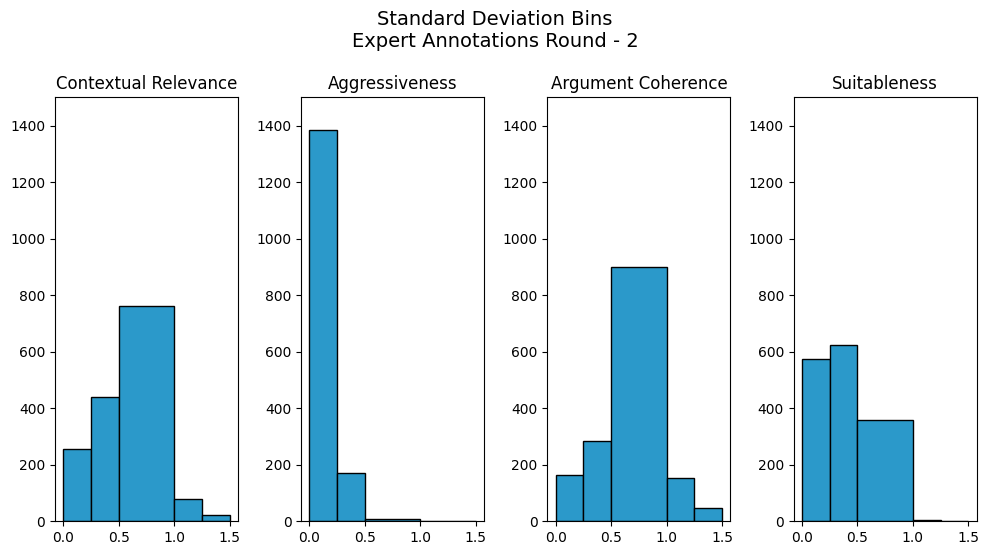

In [10]:
df_1500['relevance_score_std_dev'] = df_1500[['relevance_score_a1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].std(axis=1)
df_1500['aggressiveness_score_std_dev'] = df_1500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].std(axis=1)
df_1500['coherence_score_std_dev'] = df_1500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].std(axis=1)
df_1500['suitableness_score_std_dev'] = df_1500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].std(axis=1)

# df_500['coherence_score_std_dev'].hist(bins=8)
# Plotting
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))

# Define bin edges for histograms
bin_edges = [0,0.25,0.5,1,1.25,1.5]

# Titles for subplots
titles = ['Contextual Relevance', 'Aggressiveness', 'Argument Coherence', 'Suitableness']
use_cols = ['relevance_score_std_dev', 'aggressiveness_score_std_dev', 'coherence_score_std_dev', 'suitableness_score_std_dev']

for ax, column, title in zip(axes, df_1500[use_cols].columns, titles):
    ax.hist(df_1500[column], bins=bin_edges, color='#2b99ca', edgecolor='black')
    ax.set_title(title)
    ax.set_ylim(0, 1500)  # Adjust y-axis limits to match the example image

# Adjust layout
plt.tight_layout()

# Main title
plt.suptitle('Standard Deviation Bins\nExpert Annotations Round - 2', y=1.10, fontsize=14)

# Show plot
plt.show()

In [9]:
df_final = pd.read_csv('/home/ameyh/cs-eval/final_data/final_dataset_metrics_computed.csv')
df_final.head(1)

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,"rouge_l_(pred_cs, cs)","rouge_1_(pred_cs, cs)","rouge_2_(pred_cs, cs)","meteor_score_(pred_cs, cs)","bert_score_(hs, pred_cs)",toxicity_(pred_cs),"pc_score_(hs, pred_cs)","cd_score_(hs, pred_cs)",aq_score_(pred_cs),"bm25_score_(hs, pred_cs)"
0,"Women are basically childlike, they remain thi...",The characteristics you are referring to are a...,There are many cases of women being raped by m...,Informative,dialoGPT,NaN,{ \n'Relevance': '1'\n},511dd967-f04a-4bc4-a557-800af1656a96,{'Aggressiveness': '2'},{ \n'Coherence': '3'\n},...,0.205128,0.25641,0.0,0.129151,0.862441,0.283898,0.981284,0.698875,0.813657,-0.545166


In [13]:
print(f"Total number of unique hate speech: {df_final['hatespeech'].unique().shape}")
print(f"Total number of unique counter speech: {df_final['counterspeech'].unique().shape}")
print(f"Total number of unique predicted counter speech: {df_final['predicted_counterspeech'].unique().shape}")
print(f"Total number of datapoints {df_final.shape}")


Total number of unique hate speech: (2009,)
Total number of unique counter speech: (4461,)
Total number of unique predicted counter speech: (13843,)
Total number of datapoints (14508, 33)


In [16]:
# Average scores over each model
df_grouped = df_final[['source', 'aggressiveness_score', 'relevance_score', 'coherence_score', 'suitableness_score']].groupby('source').mean()
df_grouped

,aggressiveness_score,relevance_score,coherence_score,suitableness_score
source,,,,
GPS,1.068627,4.210240,2.668845,2.296296
GPT3.5_FS,1.053942,4.667704,3.558437,2.601660
GPT3.5_ZS,1.050411,4.768020,3.951414,2.732208
QUARC,1.002650,4.812426,4.037986,2.808598
dialoGPT,0.986292,4.624743,3.661755,2.796779


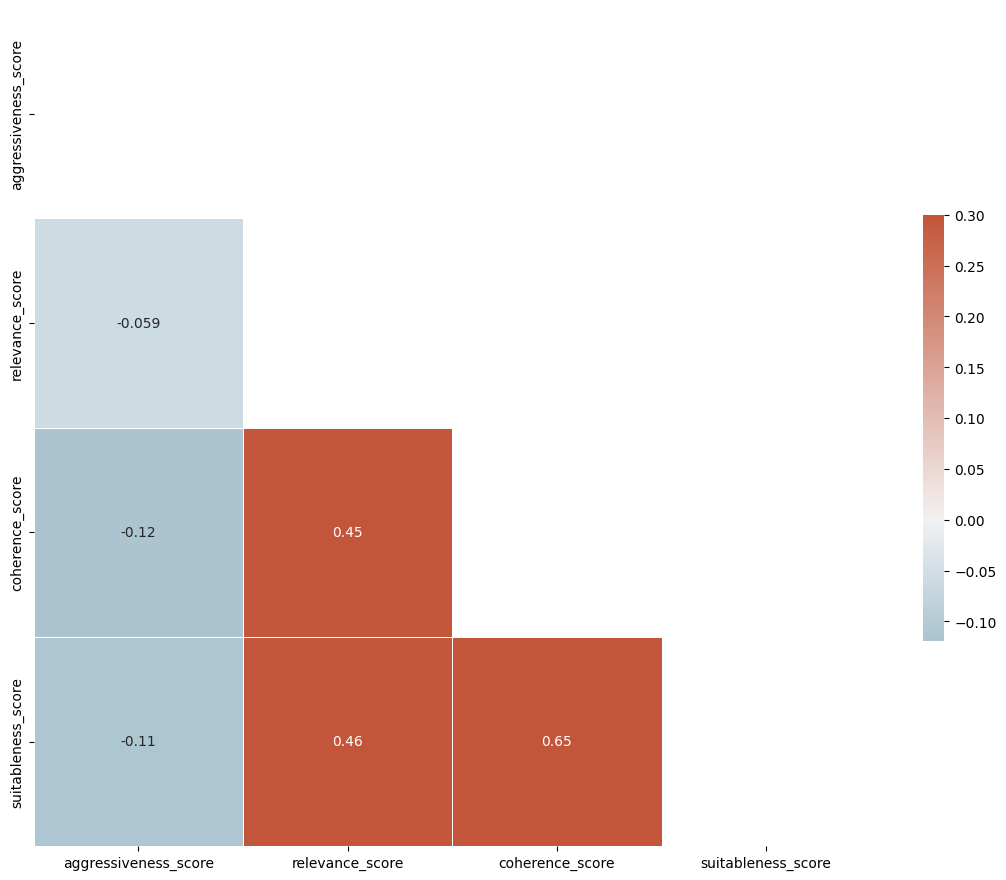

In [97]:
# Heatmap (correleation) between different metrics
import seaborn as sns

df = pd.read_csv('/home/ameyh/cs-eval/final_data/final_dataset_metrics_computed.csv')
gold_cols = ['aggressiveness_score', 'relevance_score', 'coherence_score', 'suitableness_score']
automated_metric_cols = ['']

# Calculate the correlation matrix
corr = df[gold_cols].corr()

# Create a mask to display only one triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

### Inter-annotator Agreement

In [11]:
import numpy as np
import krippendorff

def calculate_krippendorff_alpha(data):
    # Calculate Krippendorff's alpha
    alpha = krippendorff.alpha(reliability_data=data)
    
    return alpha

# Toy data: 5 annotators (rows) and 5 data points (columns)
data = np.array([
    [1, 2, 3, 2, 1],
    [2, 3, 4, 3, 2],
    [3, 4, 5, 4, 3],
    [2, 3, 4, 3, 2],
    [1, 2, 3, 2, 1],
])
print(data.shape)

alpha = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha: {alpha}")

(5, 5)
Krippendorff's alpha: 0.3999999999999999


In [13]:
df_500 = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/annotations_first_pass_500.csv')
df_500.head(1)

,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,relevance_score_annotator_1,relevance_score_annotator_2,relevance_score_annotator_3,relevance_score_annotator_4,relevance_score_annotator_5,suitableness_score_annotator_1,suitableness_score_annotator_2,suitableness_score_annotator_3,suitableness_score_annotator_4,suitableness_score_annotator_5
0,"Every Muslim is a potential terrorist, unfit t...",I understand if you have concerns about Muslim...,It is crucial to deal with this issue with fee...,Positive,GPT3.5_ZS,NaN,NaN,e3eb1ff9-eee0-4d81-b953-02ee79e7364f,{'Aggressiveness': '1'},{'Argument Coherence': '5'},...,5,4,5,5,4,4,2,2,3,4


In [ ]:
data = df_500[['relevance_score_a1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].values.T
alpha1 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (relevance score): {alpha1}")

data = df_500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].values.T
alpha2 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (aggressiveness): {alpha2}")

data = df_500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].values.T
alpha3 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (coherence): {alpha3}")

data = df_500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].values.T
alpha4 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (suitableness): {alpha4}")

print(f"Average Krippendorff's alpha: {(alpha1+alpha2+alpha3+alpha4)/4}")

In [15]:
df_1500 = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/annotations_second_pass_1500.csv')
print(df_1500.shape)
df_1500.head(1)

(1562, 59)


,hatespeech,counterspeech,predicted_counterspeech,csType,source,prediction_(prompt_aggressiveness_score)_(gpt-4),prediction_(prompt_relevance_score)_(gpt-4),uuid,prediction_(prompt_aggressiveness_score)_(gpt3.5-turbo),prediction_(prompt_coherence_score)_(gpt-3.5-turbo),...,aggressiveness_score_annotator_1,aggressiveness_score_annotator_2,aggressiveness_score_annotator_3,aggressiveness_score_annotator_4,aggressiveness_score_annotator_5,coherence_score_annotator_1,coherence_score_annotator_2,coherence_score_annotator_3,coherence_score_annotator_4,coherence_score_annotator_5
0,Muslims have no place in a modern democracy li...,Isn't divesity essential to a modern democracy?,I understand that you have a perspective on Mu...,Questioning,GPT3.5_ZS,NaN,NaN,165a7d8b-c325-4631-91b7-2bf5082a1054,{'Aggressiveness': '1'},{'Argument Coherence': '1'},...,1,1,1,1,1,2,2,1,2,1


In [ ]:
data = df_1500[['relevance_score_a1','relevance_score_annotator_2','relevance_score_annotator_3','relevance_score_annotator_4','relevance_score_annotator_5']].values.T
alpha1 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (relevance score): {alpha1}")

data = df_1500[['aggressiveness_score_annotator_1','aggressiveness_score_annotator_2','aggressiveness_score_annotator_3','aggressiveness_score_annotator_4','aggressiveness_score_annotator_5']].values.T
alpha2 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (aggressiveness): {alpha2}")

data = df_1500[['coherence_score_annotator_1','coherence_score_annotator_2','coherence_score_annotator_3','coherence_score_annotator_4','coherence_score_annotator_5']].values.T
alpha3 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (coherence): {alpha3}")

data = df_1500[['suitableness_score_annotator_1','suitableness_score_annotator_2','suitableness_score_annotator_3','suitableness_score_annotator_4','suitableness_score_annotator_5']].values.T
alpha4 = calculate_krippendorff_alpha(data)
print(f"Krippendorff's alpha (suitableness): {alpha4}")

print(f"Average Krippendorff's alpha: {(alpha1+alpha2+alpha3+alpha4)/4}")

In [1]:
import pandas as pd
dataset = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/dataset.csv')
dataset.shape

(7926, 75)

In [3]:
dataset.annotator.value_counts()

annotator
(amey,osho,apoorv)_mean    1500
(shaily,rishabh)           1000
(aswini)                    400
Name: count, dtype: int64

In [9]:
len(dataset['predicted_counterspeech'].unique())

5627

In [10]:
dataset['predicted_counterspeech'].value_counts()

predicted_counterspeech
It is important to promote inclusivity and respect for all individuals, regardless of their religious background.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [32]:
df = pd.read_csv('/home/amey/depository/cs-eval/data/annotations/inter-annotator.csv')
df.head(1)

,index,hatespeech,predicted_counterspeech,csType,relevance_score_a1,relevance_score_a2,relevance_score_a3,coherence_score_a1,coherence_score_a2,coherence_score_a3,aggressiveness_score_a1,aggressiveness_score_a2,aggressiveness_score_a3,suitableness_score_a1,suitableness_score_a2,suitableness_score_a3,suitableness_score,relevance_score,coherence_score,aggressiveness_score
0,0,Jews have no place here. They are not a part o...,Why do you believe that jews are not part of t...,Questioning,3.0,4.0,3.0,2.0,3.0,2.0,1.0,3.0,1.0,2.0,2.0,1.0,1.666667,3.333333,2.333333,1.666667


In [33]:
import krippendorff

scores = ['suitableness_score', 'relevance_score', 'coherence_score', 'aggressiveness_score']
scores_list = []
df_view = df[500:1500]

print(df_view.shape)
for score in scores:
    annotations1 = df_view[f'{score}_a1'].values.tolist()
    annotations2 = df_view[f'{score}_a2'].values.tolist()
    annotations3 = df_view[f'{score}_a3'].values.tolist()

    k_alpha = krippendorff.alpha([annotations1, annotations2, annotations3], level_of_measurement="ordinal")
    scores_list.append(k_alpha)
    print(f"Score: {score}")
    print(f"Krippendorff's Alpha: {k_alpha:.4f}")
    print('-'*50)

print(f"Mean Alpha: {np.mean(scores_list)}")

(1000, 20)
Score: suitableness_score
Krippendorff's Alpha: 0.6966
--------------------------------------------------
Score: relevance_score
Krippendorff's Alpha: 0.7597
--------------------------------------------------
Score: coherence_score
Krippendorff's Alpha: 0.7552
--------------------------------------------------
Score: aggressiveness_score
Krippendorff's Alpha: 0.5339
--------------------------------------------------
Mean Alpha: 0.6863495537366936
